# WeatherPy

#### See WeatherPY_fullcodepractice and API_practice for additional details

### Create Latitude & Longitude Combinations

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create arrays (declare as variables) of latitudes and longitudes for storing data
#  Generate random combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
# Pack as pairs by zipping them
lat_lngs = zip(lats, lngs)
# Printed: zip object in memory
lat_lngs

See the API_practice.ipynb notebook for practice packing/unpacking the tuple.

In [3]:
# Unpack lat_lngs zip object into a list so that the set of random latitudes and longitudes is created once only.
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## 6.1.5 Generate Random World Cities

Need to import the CitiPy module using pip install citipy per [citypy documentation](https://pypi.org/project/citipy/).\
  See the Homepage of the link or go directly to the [GitHub citipy repository](https://github.com/wingchen/citipy) for details.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
# Note: A python file imported into another python script does not require the .py extension be added during import.
from citipy import citipy

The citipy module finds the nearest city to the lat/lng pair with a population of 500 or more.\
  When the block code is run, there should be more than 500 unique cities. If there are fewer, increase the size limit on np.random.uniform().

In [5]:
# Create a list for holding the citites
cities = []
# Identify the nearest city for each lat and lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then add it to the cities list (note: there may be duplicates, so need 'unique')
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient number of cities
len(cities)

639

## 6.2.5 Parse a Response from an API

### [Request library](https://requests.kennethreitz.org/en/master/)

## 6.2.6 Get the City Weather Data

#### Psuedocode
1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
  * Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
  * City, country, and date
  * Latitude and longitude
  * Maximum temperature
  * Humidity
  * Cloudiness
  * Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

#### Import Dependencies and Initialize an Empty List and Counters 

In [6]:
# Import Requests library and weather_api_key
# Build the basic url for OpenWeatherMap

# Import the requests library and configure API key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Define the URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?"

In [7]:
# THIS IS THE FINAL CODE FOR GETTING THE DATA. See WeatherPy_fullcodepractice for details behind code.

# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
# Initialize at 1 to have the set to start at 1 when the first iteration of the logging for each recorded response starts 
record_count = 1
set_count = 1

# Now iterate through list of cities and begin building the URL for each city while grouping records in sets of 50
#  The index marks when 50 is reached.
# Tell the program to then pause 60 seconds as OWM API allows only 60 call/min on free tier.
#   Pause prevents timeout error
# Retrieve city from cities list and add to city_url with indexing

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # NOTE: pass here is bad coding practice; just for learning at this point

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | kaeo
Processing Record 3 of Set 1 | lujan
Processing Record 4 of Set 1 | tyazhinskiy
Processing Record 5 of Set 1 | chimbote
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | xiongzhou
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | walvis bay
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | jinxi
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | ertil
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | ust-maya
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | boyolangu
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | mataura
Processin

Processing Record 41 of Set 4 | ivanovskaya
Processing Record 42 of Set 4 | luziania
Processing Record 43 of Set 4 | leeds
Processing Record 44 of Set 4 | hlotse
Processing Record 45 of Set 4 | mrirt
City not found. Skipping...
Processing Record 46 of Set 4 | piacabucu
Processing Record 47 of Set 4 | qasigiannguit
Processing Record 48 of Set 4 | novopskov
Processing Record 49 of Set 4 | killybegs
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | sorrento
Processing Record 2 of Set 5 | krasnaya gora
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | tayoltita
Processing Record 5 of Set 5 | andenes
Processing Record 6 of Set 5 | borzna
Processing Record 7 of Set 5 | erzin
Processing Record 8 of Set 5 | port augusta
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | ust-nera
Processing Record 11 of Set 5 | ilawe
Processing Record 12 of Set 5 | coihueco
Processing Record 13 of Set 5 | bambous virieux
P

Processing Record 27 of Set 8 | saskylakh
Processing Record 28 of Set 8 | nong bua
Processing Record 29 of Set 8 | coquimbo
Processing Record 30 of Set 8 | mandalgovi
Processing Record 31 of Set 8 | mildura
Processing Record 32 of Set 8 | oskemen
Processing Record 33 of Set 8 | ossora
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | taga
Processing Record 37 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 38 of Set 8 | gazanjyk
Processing Record 39 of Set 8 | mlawa
Processing Record 40 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 8 | hinton
Processing Record 42 of Set 8 | samarinda
Processing Record 43 of Set 8 | ji-parana
City not found. Skipping...
Processing Record 44 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 45 of Set 8 | general roca
Processing Record 46 of Set 8 | aktau
Processing Record 47 of Set 8 | bathsheba
Processing Record 48 of Set 8 

Processing Record 15 of Set 12 | arvin
Processing Record 16 of Set 12 | san cristobal
Processing Record 17 of Set 12 | boundiali
Processing Record 18 of Set 12 | meyungs
City not found. Skipping...
Processing Record 19 of Set 12 | hongjiang
Processing Record 20 of Set 12 | zhicheng
Processing Record 21 of Set 12 | margate
Processing Record 22 of Set 12 | winslow
Processing Record 23 of Set 12 | maceio
Processing Record 24 of Set 12 | san quintin
Processing Record 25 of Set 12 | vegueta
Processing Record 26 of Set 12 | shingu
Processing Record 27 of Set 12 | nioro
Processing Record 28 of Set 12 | aykhal
Processing Record 29 of Set 12 | zyryanka
Processing Record 30 of Set 12 | wamba
Processing Record 31 of Set 12 | yinchuan
Processing Record 32 of Set 12 | mbandaka
Processing Record 33 of Set 12 | hihifo
City not found. Skipping...
Processing Record 34 of Set 12 | sechura
Processing Record 35 of Set 12 | makakilo city
Processing Record 36 of Set 12 | half moon bay
Processing Record 37 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,261.27,68,2,3.45,GL,2022-01-22 12:32:49
1,Kaeo,-35.1000,173.7833,289.44,89,37,2.38,NZ,2022-01-22 12:27:35
2,Lujan,-34.5703,-59.1050,298.05,88,99,6.35,AR,2022-01-22 12:30:04
3,Tyazhinskiy,56.1160,88.5240,255.30,98,89,1.82,RU,2022-01-22 12:32:50
4,Chimbote,-9.0853,-78.5783,294.90,81,9,1.82,PE,2022-01-22 12:32:50
5,Puerto Ayora,-0.7393,-90.3518,295.70,89,34,1.82,EC,2022-01-22 12:26:52
6,Rikitea,-23.1203,-134.9692,298.77,68,87,4.79,PF,2022-01-22 12:27:28
7,Xiongzhou,25.1167,114.3000,288.86,93,99,0.79,CN,2022-01-22 12:32:51
8,Hermanus,-34.4187,19.2345,311.98,44,15,4.72,ZA,2022-01-22 12:27:32
9,Walvis Bay,-22.9575,14.5053,299.68,61,40,4.12,NA,2022-01-22 12:32:51


In [9]:
# Reorder the columns for readability
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Reassign df to new order
city_data_df = city_data_df[new_column_order]
city_data_df.head(3)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2022-01-22 12:32:49,60.9167,-46.0500,261.27,68,2,3.45
1,Kaeo,NZ,2022-01-22 12:27:35,-35.1000,173.7833,289.44,89,37,2.38
2,Lujan,AR,2022-01-22 12:30:04,-34.5703,-59.1050,298.05,88,99,6.35


In [10]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Section 3 - Plotting Weather Data for Kids' STEM Project

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Weather_Data/cities.csv"

# Read the data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(3)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Narsaq,GL,1/22/2022 12:32,60.9167,-46.0500,261.27,68,2,3.45
1,1,Kaeo,NZ,1/22/2022 12:27,-35.1000,173.7833,289.44,89,37,2.38
2,2,Lujan,AR,1/22/2022 12:30,-34.5703,-59.1050,298.05,88,99,6.35


In [2]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [3]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1642860212.7176523

In [4]:
# Convert for readability
today = time.strftime("%x")
today

'01/22/22'

### 6.3.1 Latitude vs Temperature

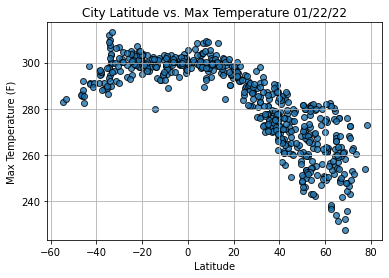

In [5]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig1.png")

# Show plot.
plt.show()

### 6.3.2: Latitude vs. Humidity

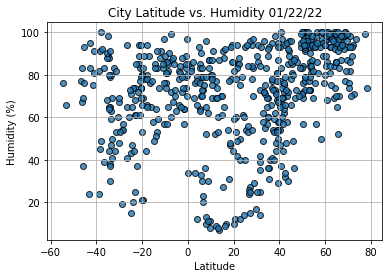

In [6]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Data/Fig2.png")

# Show plot.
plt.show()

### 6.3.3: Latitude vs. Cloudiness

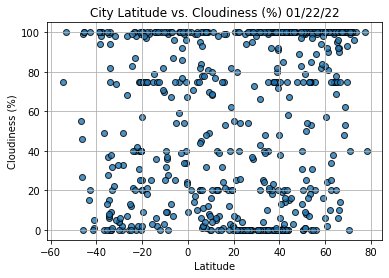

In [7]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Data/Fig3.png")

# Show plot.
plt.show()

### 6.3.4 Latitude vs. Wind Speed

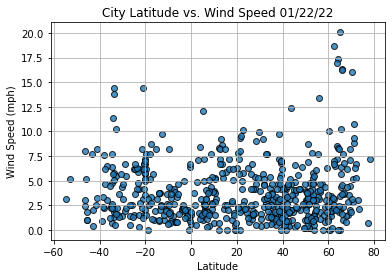

In [8]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Data/Fig4.png")

# Show plot.
plt.show()